In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay
from joblib import dump
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
X_train = pd.read_csv("../../Split Data/Training Dataset/X_train #1.csv").drop(columns=["Unnamed: 0"])
y_train = pd.read_csv("../../Split Data/Training Dataset/y_train #1.csv", index_col=0)
X_test = pd.read_csv("../../Split Data/Testing Dataset/X_test #1.csv").drop(columns=["Unnamed: 0"])
y_test = pd.read_csv("../../Split Data/Testing Dataset/y_test #1.csv", index_col=0)

In [3]:
rand_forest = RandomForestClassifier(n_estimators=10, max_depth = 20, random_state=10, )

In [4]:
rand_forest.fit(X_train, y_train)

/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(max_depth=20, n_estimators=10, random_state=10)

In [5]:
y_pred = rand_forest.predict(X_test)

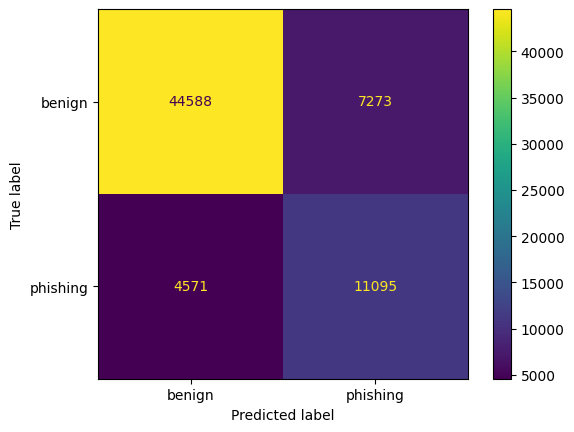

In [6]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
matrix = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ["benign", "phishing"])                            
matrix.plot()

In [7]:
Accuracy = metrics.accuracy_score(y_test, y_pred)
Precision = metrics.precision_score(y_test, y_pred)
Recall = metrics.recall_score(y_test, y_pred)
F1_score = metrics.f1_score(y_test, y_pred)

In [8]:
print({"Accuracy":Accuracy,"Precision":Precision,"Recall":Recall,"F1_score":F1_score})

{'Accuracy': 0.8246034919365587, 'Precision': 0.6040396341463414, 'Recall': 0.7082216264521894, 'F1_score': 0.6519950637597697}


In [9]:
df = pd.read_csv("Metrics of Dataset #1.csv")

In [10]:
metrics = pd.DataFrame({"Model": "Random Forest", "Accuracy": [Accuracy], "Precision":[Precision], "Recall": [Recall], "F1_score": [F1_score]})

In [11]:
df = pd.concat([df, metrics], ignore_index=True)

In [12]:
df.head()

,Model,Accuracy,Precision,Recall,F1_score
0,LinearSVC,0.718824,0.433593,0.692072,0.533156
1,Random Forest,0.824603,0.604040,0.708222,0.651995


In [13]:
df.to_csv("Metrics of Dataset #1.csv", index=False)

In [14]:
dump(rand_forest, 'rand_forest #1.joblib')

['rand_forest #1.joblib']